# Climate Change Is Inevitable But Do Some Countries Stand A Better Chance Against It Than Others?
## Introduction:
>&emsp; Climate change is a very critical and ever-looming issue which many of us remain powerless over and can do nothing about but watch. It is because of this threatening existential nature that makes it a very rewarding and reasonable data set to be interested in and analyze. We hope our findings can give us some insight into what geographical and societal problems of countries may be in any way correlated to climate change. Furthermore, our analysis can further prove the threat this issue poses by showing what the future may look like if nothing is done about it.\
\
&emsp;This project was worked on by Adam Callanan, Trevor Lee, and Angus Murchison. Adam found the dataset used, wrote the intro, came up with the questions explored, and solved a few questions. Trevor did the initial analysis of the data and solved the majority of the questions. Angus wrote the description for the dataset, the potential for data science, and conclusion.
## Description of the Data:
>Source: https://www.kaggle.com/sevgisarac/temperature-change \
\
&emsp; The FAOSTAT Temperature Change data set is a collection of the average change of temperature of 190 countries and 37 territories in Celsius,  recorded monthly from 1961-2019, giving the annual, seasonal and monthly temperature outliers with respect to the 1951-1980 recordings.
>- Area Code - The numerical code of area column, type of area code is an integer
>- Area - Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object
>- Months Code - The numerical code of months column, type of months code is an integer
>- Months - Months, Seasons, Meteorological year, type of months is an object
>- Element Code - The numerical code of element column, type of element code is an integer
>- Element - 'Temperature change', 'Standard Deviation', type of element is an object
>- Unit - Celsius degrees °C, type of unit is an object
>- Y1961 - Mean Surface Temperature change in the year 1961
>- Y1962 - Mean Surface Temperature change in the year 1962
>- ...
>- Y2019 - Mean Surface Temperature change in the year 2019
## Analysis of the Data
>**Importing the data**

In [1]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('Environment_Temperature_change_E_All_Data_NOFLAG.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

>**Getting to know the data**
>- How many records are there?

In [2]:
#len()/2 because there is a line for both temperature and standard deviation for every row
print("There are", len(data)/2, "records")

There are 4828.0 records


> - How many unique values are there?

In [3]:
#use sets to hold only unique values, then get length
areas = set()
for i in range(len(data)):
    areas.add(data[i]['Area'])

print("There are", len(areas), "unique area values")
#areas

There are 284 unique area values


>- What is the date range?

The data ranges from all months/seasons/full years for 59 years from 1961 to 2019

>- How many months/seasons were recorded per year?

In [4]:
month_codes = set()
for i in range(len(data)):
    month_codes.add(data[i]['Months'])
    
print("There are", len(month_codes), "recorded time periods per year (some overlap)")

There are 17 recorded time periods per year (some overlap)


>**Initial Analysis of the Data**
>- Statsitics per year across every country

In [5]:
#load csv to dataframe
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv')
df.set_index('Element', inplace=True)

temps = df.loc['Temperature change']
stds = df.loc['Standard Deviation']

#yearly numbers
yearly_temps = temps.set_index('Months').loc['Meteorological year'].reset_index()
yearly_temps.set_index('Area', inplace=True)
yearly_temps.drop(['Months', 'Area Code', 'Months Code', 'Element Code', 'Unit'], axis=1, inplace=True)

#statsitics per year across every country
yearly_temps.describe()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,244.000000,245.000000,244.000000,242.000000,244.000000,247.000000,246.000000,246.000000,246.000000,245.000000,...,265.000000,268.000000,263.000000,266.000000,265.000000,265.000000,264.000000,265.000000,265.000000,264.000000
mean,0.170922,-0.022873,-0.028361,-0.106037,-0.254930,0.098972,-0.107878,-0.199280,0.117191,0.078967,...,1.122019,0.835892,0.916589,0.956744,1.123158,1.285736,1.468284,1.301789,1.307709,1.443481
std,0.407753,0.346358,0.407603,0.297567,0.259874,0.412849,0.340615,0.333088,0.340962,0.341049,...,0.595869,0.399259,0.479590,0.332919,0.567903,0.470588,0.471719,0.409422,0.600546,0.475380
min,-0.688000,-1.364000,-2.245000,-0.871000,-1.058000,-2.357000,-1.013000,-3.252000,-1.740000,-1.284000,...,-0.328000,-0.232000,-0.216000,-0.423000,-0.162000,-0.095000,-0.188000,0.154000,0.203000,0.082000
25%,-0.080250,-0.174000,-0.210250,-0.256250,-0.410750,-0.048000,-0.280000,-0.329500,-0.040750,-0.061000,...,0.774000,0.540250,0.606500,0.741000,0.744000,0.989000,1.216750,1.057000,0.882000,1.177250
50%,0.047000,-0.068000,0.015000,-0.114000,-0.233500,0.082000,-0.168500,-0.191000,0.190500,0.115000,...,1.126000,0.803000,0.812000,0.952500,1.003000,1.243000,1.435000,1.304000,1.149000,1.419000
75%,0.320500,0.114000,0.198250,0.079000,-0.103000,0.266500,0.018000,-0.052250,0.320500,0.270000,...,1.345000,1.097250,1.199500,1.170750,1.360000,1.540000,1.722500,1.547000,1.610000,1.695750
max,1.906000,1.044000,1.174000,1.121000,0.856000,1.426000,1.139000,0.822000,0.825000,0.982000,...,3.042000,2.106000,3.825000,2.272000,3.382000,3.307000,5.413000,3.347000,4.104000,2.903000


>- Global average temperature change

In [6]:
#Work for this was completed using Excel's data analysis tools
def get_data_csv():
    collection = []
    with open('Global_Avg.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
#The total average temperature change of each year.
global_avg = pd.DataFrame(get_data_csv()).astype(float).rename(index={0:"Global Average"})
global_avg

,﻿Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
Global Average,0.399626,0.313298,0.313013,0.268455,0.215335,0.37343,0.261392,0.243007,0.380266,0.361275,...,0.88077,0.765319,0.787324,0.826378,0.912089,1.016034,1.077557,1.000159,1.007113,1.092196


>- Statsitics per country across every year

In [7]:
#fix naming error to add global average to yearly_temps
global_avg.rename(columns={global_avg.keys()[0] : yearly_temps.keys()[0]}, inplace=True)

yearly_temps = pd.concat([yearly_temps, global_avg])

transposed_yearly_temps = yearly_temps.dropna().transpose()

temps.set_index('Area', inplace=True)

stds.set_index('Area', inplace=True)
stds = stds[['Months', 'Y1961']]
stds.rename(columns={'Y1961' : 'std'}, inplace=True)

#statsitics per country across every year
transposed_yearly_temps.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antarctica,Argentina,Australia,Austria,...,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD,Global Average
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.432322,0.485492,0.711153,0.691475,0.412932,0.256203,0.157508,0.264915,0.433441,0.748559,...,0.618356,0.472119,0.557220,0.438373,0.436712,0.479729,0.602034,0.467119,0.494085,0.566032
std,0.653337,0.721527,0.722079,0.745074,0.456527,0.380941,0.577477,0.342943,0.456148,0.885730,...,0.738804,0.462352,0.502578,0.433574,0.442544,0.464551,0.626181,0.461788,0.547961,0.244908
min,-1.131000,-0.788000,-0.831000,-0.755000,-0.333000,-0.543000,-0.778000,-0.368000,-0.500000,-0.882000,...,-0.576000,-0.264000,-0.216000,-0.334000,-0.265000,-0.287000,-0.526000,-0.268000,-0.527000,0.215335
25%,-0.105500,-0.087000,0.089500,0.077000,0.102500,0.001500,-0.237000,0.000500,0.117000,0.037000,...,-0.016500,0.135500,0.183000,0.096500,0.096500,0.157000,0.160500,0.138000,0.007500,0.368901
50%,0.423000,0.282000,0.649000,0.749000,0.325000,0.283000,0.132000,0.291000,0.329000,0.677000,...,0.719000,0.441000,0.489000,0.439000,0.409000,0.433000,0.555000,0.387000,0.487000,0.497134
75%,0.877000,1.101000,1.296000,1.242500,0.704000,0.507000,0.610000,0.453500,0.784000,1.422500,...,1.173000,0.846000,0.940500,0.729000,0.819500,0.865000,1.085500,0.850000,0.878500,0.771206
max,1.647000,2.232000,2.359000,1.987000,1.694000,0.963000,1.738000,1.057000,1.450000,2.511000,...,2.057000,1.405000,1.482000,1.516000,1.345000,1.412000,2.098000,1.366000,1.850000,1.092196


## Exploratory Data Analysis

1. How much of a difference, if any, has climate change affected the yearly temperature fluctuations of first-world countries compared to third-world countries? Using Canada, the United Kingdom, and Japan for first-world countries and Afghanistan, Madagascar, and Bolivia for the third-world countries.
    - This can be achieved by analyzing each country’s average standard temperature deviation for the time periods of 1961-1966 and 2014-2019. From here we can perform the following analysis for each time period then compare the results to see how climate change has affected yearly temperature fluctuations and if overall country well-being plays any role in it: 
        * We can check the 2 groups independently to see if there is any correlation between the standard temperature deviation between the countries. 
        * We can compare the 2 groups together by comparing each group’s average standard temperature deviation.

Average temperature change of each country
Canada                              0.602678
United Kingdom                      0.412339
Japan                               0.318000
Afghanistan                         0.432322
Madagascar                          0.364085
Bolivia (Plurinational State of)    0.457797
dtype: float64


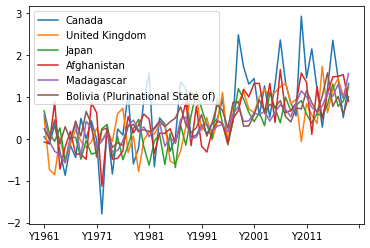

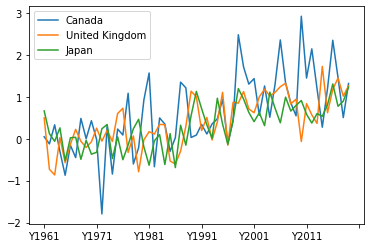

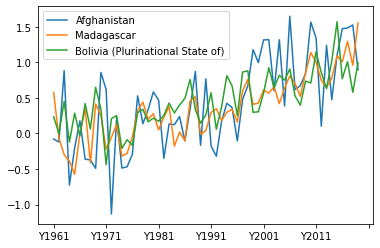

In [8]:
sample_temps = yearly_temps.loc[['Canada', 'United Kingdom', 'Japan', 'Afghanistan', 'Madagascar', 'Bolivia (Plurinational State of)']]

avg = sample_temps.mean(axis = 1)
print("Average temperature change of each country")
print(avg)

first_temps = sample_temps.loc[['Canada', 'United Kingdom', 'Japan']]
first_temps = first_temps.transpose()

third_temps = sample_temps.loc[['Afghanistan', 'Madagascar', 'Bolivia (Plurinational State of)']]
third_temps = third_temps.transpose()

sample_temps = sample_temps.transpose()
sample_temps.plot();
first_temps.plot();
third_temps.plot();

>&emsp; The results show that yearly average temperature of each country is steadily increasing. When looking at the average temperature change of each country we see that every country has around the same yearly change except for Canada which is much higher than the rest. This is further supported after graphing the yearly temperature changes as we can see all the other countries group and almost blend together in the middle but with Canada spiking out from the main group periodically. Overall, this shows that there exists no correlation between a country's economic status and its temperature change due to global warming. However, the results do suggest a correlation between a country's location and its temperature change.


2. How much of a difference, if any, has climate change affected the yearly temperature fluctuations of northern countries compared to countries along the equator? Using Colombia, Kenya, and Indonesia as equatorial countries and Canada, Greenland and Norway as northern countries.
    - This can be achieved by analyzing each country’s average standard temperature deviation for the time periods of 1961-1966 and 2014-2019. From here we can perform the following analysis for each time period then compare the results to see how climate change has affected yearly temperature fluctuations and if positive latitude plays any role in it: 
        * We can check the 2 groups independently to see if there is any correlation between the standard temperature deviation between the countries. 
        * We can compare the 2 groups together by comparing each group’s average standard temperature deviation.

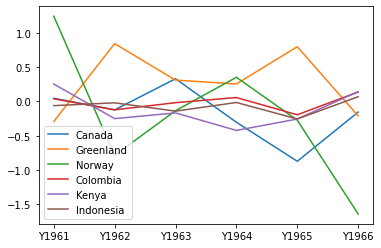

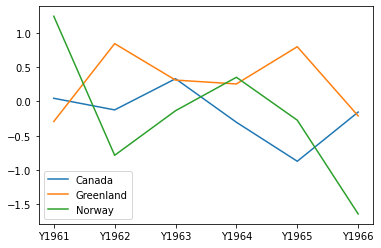

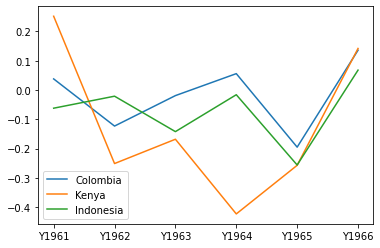

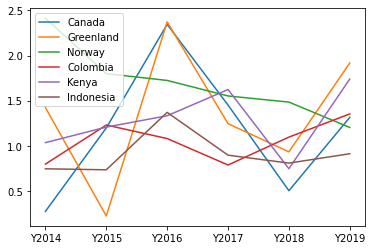

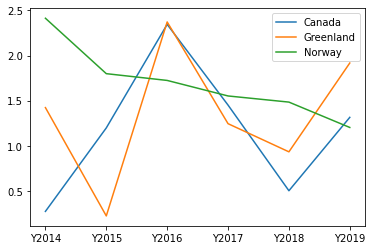

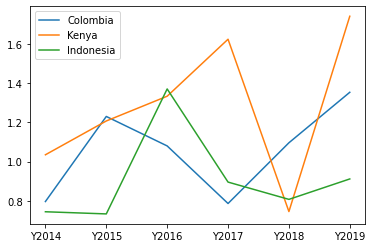

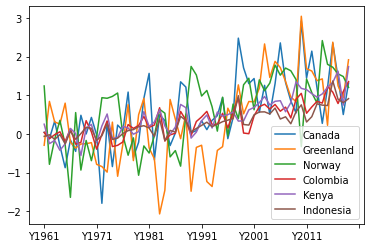

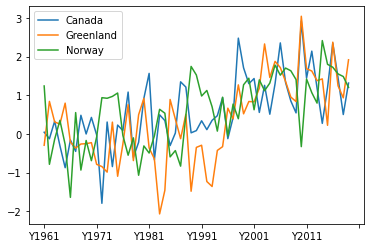

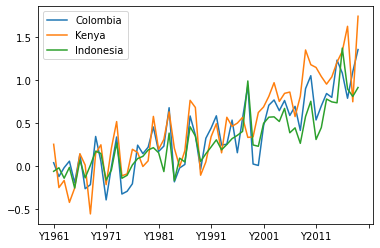

In [9]:
#set up yearly temperature data frames for whole sample, northern and equatorial countries
sample_temps = yearly_temps.loc[['Canada', 'Greenland', 'Norway', 'Colombia', 'Kenya', 'Indonesia']]

north_temps = sample_temps.loc[['Canada', 'Greenland', 'Norway']]
north_temps = north_temps.transpose()

eq_temps = sample_temps.loc[['Colombia', 'Kenya', 'Indonesia']]
eq_temps = eq_temps.transpose()

sample_temps = sample_temps.transpose()

#output graphs
sample_temps.loc[:'Y1966'].plot();
north_temps.loc[:'Y1966'].plot();
eq_temps.loc[:'Y1966'].plot();
sample_temps.loc['Y2014':].plot();
north_temps.loc['Y2014':].plot();
eq_temps.loc['Y2014':].plot();
sample_temps.plot();
north_temps.plot();
eq_temps.plot();

In [10]:
north_mins = north_temps.min()
north_maxs = north_temps.max()
north_range = north_maxs - north_mins
north_range

Canada       4.710
Greenland    5.109
Norway       4.052
dtype: float64

In [11]:
eq_mins = eq_temps.min()
eq_maxs = eq_temps.max()
eq_range = eq_maxs - eq_mins
eq_range

Colombia     1.747
Kenya        2.297
Indonesia    1.626
dtype: float64

>&emsp; For all sampled countries, the yearly temperature change has been increasing as time goes on. The northern countries don't line up too much expcept for Canada and Greenland in recent years. The main similarity is that the fluctuation of the temperature change (range) is much greater, including rising at a greater rate. The caveat here is that both Greenland and Canada both have large land masses. This could alter the data since there are more climates being measured. Perhaps smaller countries would be preferable to analyze, but all smaller northern countries are grouped in Europe which is further south than the selected sample and also relatively in the same area. The graphs for the equatorial countries are really similar and tend to line up despite being on largely different longitudes. While the same conclusion can't neccessarily be drawn for the northern countries, this shows that the there could be a relationship with distance from the equator and temperature change.

3. How have the average temperature fluctuations of Canada’s seasons changed over the years? What does this say about our future?
    - This can be achieved by creating a graph of Canada’s standard temperature deviation vs year for each of the seasons. From here we can do a number of things:
        * We can identify if any of the seasons have a correlation with their standard temperature deviation over time.
        * We can identify a trend line to predict what temperature fluctuation we can expect in the near future.
        * We can compare the different season’s graphs to see how climate change affects the different seasons.

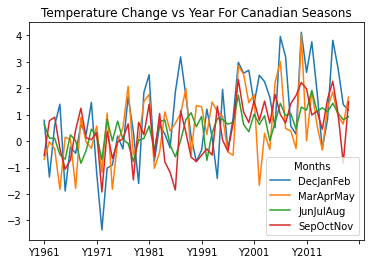

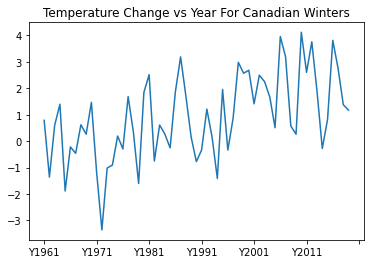

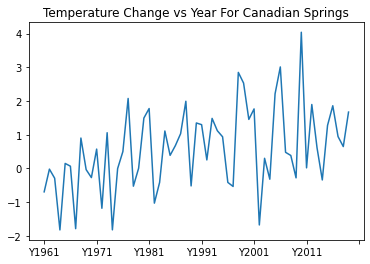

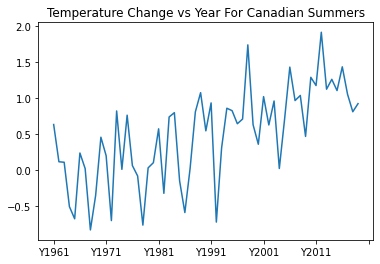

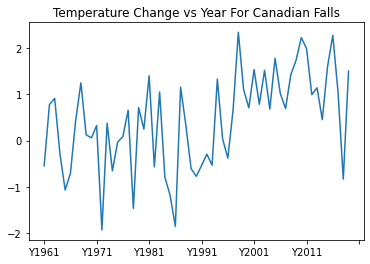

In [12]:
canada = temps.loc['Canada'].set_index('Months')
canada = canada.loc[['DecJanFeb', 'MarAprMay', 'JunJulAug', 'SepOctNov']]
canada_temps = canada.drop(['Area Code', 'Months Code', 'Element Code', 'Unit'], axis=1)

canada_temps = canada_temps.transpose()
canada_temps.plot();
plt.title("Temperature Change vs Year For Canadian Seasons")
plt.show();
plt.title("Temperature Change vs Year For Canadian Winters")
canada_temps['DecJanFeb'].plot();
plt.show();
plt.title("Temperature Change vs Year For Canadian Springs")
canada_temps['MarAprMay'].plot();
plt.show();
plt.title("Temperature Change vs Year For Canadian Summers")
canada_temps['JunJulAug'].plot();
plt.show();
plt.title("Temperature Change vs Year For Canadian Falls")
canada_temps['SepOctNov'].plot();
plt.show();

>&emsp; Each season has a trend of a slowly increasing average temperature change. However, with respect to the average temperature change a trend line would predict, the actual temperature change, year to year, would be very sporadic around that line. With that said by looking at all the graps drawn on the same graph we can see that the most sporadic seasons for year to year temperature change in order of most sporadic to least is Winter, Spring, Fall, Summer with Winter also being above the trend line more so than the other seasons in the later years. This could mean we could expect hotter and Winters with less and less snow without seeing much of a difference in our Summers on average in the next 5 years or so. This also, of course, suggests that climate change has a greater affect on colder climates than warmer climates.

4. How have yearly temperature fluctuations changed over time for today’s most polluted countries? Using Bangladesh, Pakistan, and India
    - This can be achieved by creating a graph of yearly standard temperature deviation vs year for each of the countries. From here we can do a number of things:
        * We can identify a trend line to predict what temperature fluctuations we can expect in the near future for each country.
        * We can compare the different country’s graphs to see how climate change affects polluted countries.

Average temperature change of each country
Bangladesh    0.227746
Pakistan      0.199237
India         0.216627
dtype: float64


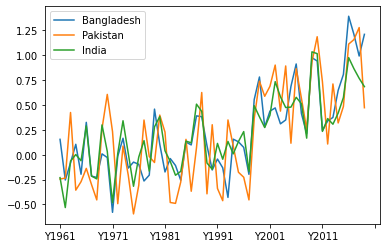

In [13]:
polluted = yearly_temps.loc[['Bangladesh', 'Pakistan', 'India']]

avg = polluted.mean(axis = 1)
print("Average temperature change of each country")
print(avg)

polluted.transpose().plot();

>&emsp; Both the average yearly temperature change values and the temperature change vs year graph of each country are very close matches of each other. This result shows a strong correlation between highly polluted countries and temperature change per year. Assuming there is reasonable causation between this trend then it can be predicted that if global warming continues as it is now then these countries will surpass 1.25 celsius per year before 2030.

5. How have yearly temperature fluctuations changed over time for today’s most populated countries? Using China, India, and the United States.
    - This can be achieved by creating a graph of yearly standard temperature deviation vs year for each of the countries. From here we can do a number of things:
        * We can identify a trend line to predict what temperature fluctuations we can expect in the near future for each country.
        * We can compare the different country’s graphs to see how climate change affects countries with high populations.

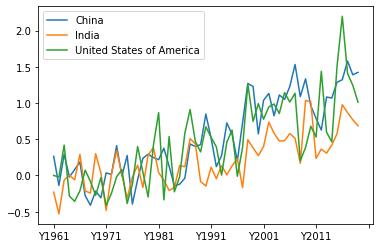

In [14]:
populated = yearly_temps.loc[['China', 'India', 'United States of America']]
populated.transpose().plot();

>&emsp; Likemost other examples used up until this point, each country appears to be experiencing a steady increase over time. While America and China align a little bit in the middle years (approximately 1985-1997), the graphs do not line up or appear that similar for the other portions outside on the general trends. India also appears to have experienced a significantly lower increase in temperature over time with its graph distinctly below the others at many points, especially in more recent years (approximately 1996). In sum, it doesn't appear as though there is a strong relationship between population and climate change with just this data. There could be a relationship tying them together such as pollution, but that is just speculation at this point with this data.

6. How do the yearly temperature fluctuations of the countries compare to the global average temperature fluctuations?
    - This can be achieved by using the importing the data into excel, creating a new column of the average metrological temperature change per year, then seeing which countries have the lowest R value with this average.
        * Looking at the 3 or so lowest R value countries, do they have anything in common?

Top 3 countries with the lowest covariance with respect to the global average: Chile, Argentina, and Antarctica


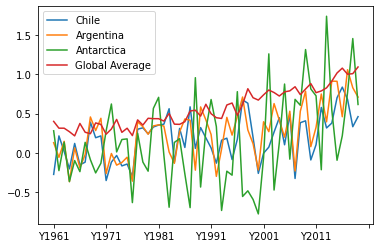

In [15]:
# Lowest covariances are found using Excel's covariance tool
print("Top 3 countries with the lowest covariance with respect to the global average: Chile, Argentina, and Antarctica")
low = yearly_temps.loc[['Chile','Argentina','Antarctica']]
low_compare = low.append(global_avg)
low_compare.transpose().plot();

>&emsp; As seen on the graph the lowest covariance countries with respect to the global average also all have temperature changes per year much lower than the global average. Another thing in common between these countries is that they're all very south of the equator. This is an interesting result as our analysis of northern countries would suggest the latitude of countries has no affect on temperature change as the only difference geographically speaking between northern and southern countries is the timing of their seasons, however this would average out to be the same per year regardless. Though it's also important to note that most northern countries are generally more popullated, cover a larger area, and have a lower pollution index than southern countries. With this in mind its difficult to determine if the low covariance is due to latitude, one of the afforementioned factors, or some combination.

7. When looking at average yearly temperature fluctuations, what are the top 3 highest countries? 

Mongolia                          0.853729
Svalbard and Jan Mayen Islands    0.847881
Gambia                            0.821237
Global Average                    0.566032
dtype: float64


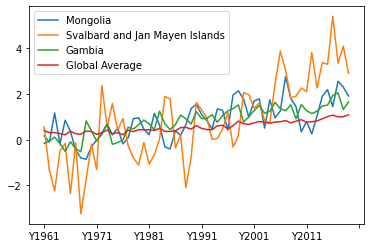

In [16]:
#highest averages amongst all years
yearly_avg_temp_change = transposed_yearly_temps.mean().sort_values(ascending=False)
high_3 = yearly_avg_temp_change[:3].keys().tolist()
high_3.append('Global Average')

print(yearly_avg_temp_change[high_3])

transposed_yearly_temps[high_3].plot();

>&emsp; The three countries that have the highest average temperature change from year to year are Mongolia, Svalbard and Jan Mayen Islands, and Gambia. Each of these three countries experiences a steady increase greater than that of the global rate. Each started below the global average before rising and finishing well above the rate. Svalbard and Jan Mayen Islands have an especially volatile rate of change with dips around a reduction of two degrees celcius and even approaching three as sharp rises past approaching four degrees and even past five. This is in sharp contract to the relatiely steady rising of rate of temperature change in Mongolia and Gambia. Geographically, no easily identifiable feature or trait stands out based on a limited knowledge of these countries. One is a far north island territory, one is on the African coast near the equator, the other is inland north of the equator. Therefore a cause cannot be identified at this point. 

8. When looking at average yearly temperature fluctuations, what are the top 3 lowest countries? 

Antarctica                   0.157508
Saint Pierre and Miquelon    0.158051
Chile                        0.184254
Global Average               0.566032
dtype: float64


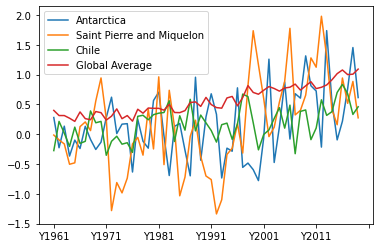

In [17]:
#lowest averages amongst all years
low_3 = yearly_avg_temp_change.sort_values()[:3].keys().tolist()
low_3.append('Global Average')

print(yearly_avg_temp_change[low_3])

transposed_yearly_temps[low_3].plot();

>&emsp; The three countries experiencing the lowest temperature change are Antarctica, Saint Pierre and Milquelon, and Chile. Each country's change line stays below the global average more often than not, often only going over one year at a time with a couple instances for two years and only once staying over for three consecutive years. Each started below the global average in 1961 and ended below the average as well in 2019. Further, While there are many sharp upward spikes, these never go above a change of two degrees celcius and unlike other samples, there are also many sharp dips in the data. The thing tying all of these countries that I can see is the ocean. The territory of Saint Pierre and Miquelon is a small island just south of Newfoundland. Chile occupies much of the western coast in South America. Antarctica, while a mild exception due to its large land mass, also has a large coastline. On its own, this could possibly suggest a correlation between coastal regions and lowered effects of climate change. However, Svalbard and Jan Mayen Islands in the top three highest suggests otherwise as it is an island territory north of Norway.

## Potential for Data Science
>&emsp; While working through our analysis question we discovered a strange outlier consistent with all countries' yearly temperature change, and that outlier was a large spike in temperature around 1990. From this, a new project could be proposed to create three algorithms, one from 1961-1990, the second from 1990-2019, and the third from 1961-2019. Then, over the next few years, see which one better predicts the change in yearly temperature. As well as the data can be further analyzed to improve the understanding of the correlation between data points that may show correlation, but may have underlying attributes that affect the trends.

## Conclusion
>&emsp; While performing data analysis on this data set, we set out to answer 8 major questions we had about the data. These questions focused on how climate change in each country was affected by; economic status, latitude, seasonal difference, pollution rates, population, how it compares to the global average rates, and how the countries with the greatest and least yearly fluctuations compare to the global average rates respectively. There was little to no correlation found when exploring how population, economic status, and the countries with the greatest and least yearly fluctuations with respect to the global average rates, affected the change in yearly temperature. This is likely due to there being many other factors affecting the temperature increase at once. However, the seasonal variations, pollution, countries with low covariance with respect to the global average rates, and latitude showed some correlation to the increase in yearly temperature change. However, there may not be direct causality due to other underlying factors being present. The biggest limitations with this data set were the lack of correlation, or the false correlation between data trends such as the relation between the yearly change in temperature and the latitude of the country. While these data points showed a moderate correlation, this may be due to an unforeseen factor such as landmass size or the amount of coastal distance the country possesses. These limitations can be resolved by taking the data analysis further with another project that seeks to create an algorithm that can predict a country’s temperature change. From assessing this data, we have learned much about how climate change is affected by many factors including location and pollution, in addition to learning how to confront some of the difficulties that arise when performing data analysis. This includes learning how to more efficiently work with data frames, with respect to graphing and rearranging.